In [1]:
import numpy as np
from skimage.io import imsave, imread
import matplotlib.pyplot as plt

In [2]:
#Read in files
dapi=imread('/Users/wangy6/Desktop/dapi.tif')
AF546=imread('/Users/wangy6/Desktop/AF546.tif')

FileNotFoundError: [Errno 2] No such file or directory: '\\\\dm11.hhmi.org\\sternson$\\zhuz2\\Users\\wangy6\\Desktop\\dapi.tif'

In [3]:
lo=np.percentile(np.ndarray.flatten(dapi),99.5) #Estimate fluorescence intensity of bright DAPI signals

In [6]:
bg_dapi=np.percentile(np.ndarray.flatten(dapi[dapi!=0]),1) 
data=AF546.copy()
bg_data=np.percentile(np.ndarray.flatten(data[data!=0]),1) #Estimate background in AF546 channel
dapi_factor=np.median((data[dapi>lo] - bg_data)/(dapi[dapi>lo] - bg_dapi)) #Estimate % of signal bleedthrough
data  = np.maximum(0, data - bg_data - dapi_factor * (dapi -bg_dapi)).astype('float32')#subtract background and bleedthrough

182.0


In [10]:
print('bleed_through:',dapi_factor)
print('DAPI background:',bg_dapi)
print('c3 background:',bg_data)

bleed_through: 0.4024390243902439
DAPI background: 182.0
c3 background: 184.0


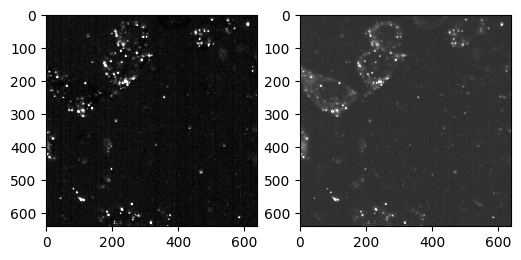

In [35]:
fig,ax=plt.subplots(1,2,dpi=100)
ax[0].imshow(data[1000,:,:],'gray',vmax=150)
ax[1].imshow(AF546[1000,:,:],'gray',vmax=500)